In [331]:
pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [332]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import pickle

In [333]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

In [334]:
df.head(3)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative


In [335]:
df = df[df["Disease"].map(df["Disease"].value_counts()) > 4]

In [336]:
df['Outcome Variable'] = df['Outcome Variable'].map({'Negative': 0, 'Positive': 1})
df['Cholesterol Level'] = df['Cholesterol Level'].map({'Low': 0, 'Normal': 1, 'High': 2})
df['Blood Pressure'] = df['Blood Pressure'].map({'Low': 0, 'Normal': 1, 'High': 2})
df["Fever"] = df["Fever"].map({'No': 0, 'Yes': 1})
df["Cough"] = df["Cough"].map({'No': 0, 'Yes': 1})
df["Fatigue"] = df["Fatigue"].map({'No': 0, 'Yes': 1})
df["Difficulty Breathing"] = df["Difficulty Breathing"].map({'No': 0, 'Yes': 1})
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})


df


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,0,1,1
1,Common Cold,0,1,1,0,25,0,1,1,0
2,Eczema,0,1,1,0,25,0,1,1,0
3,Asthma,1,1,0,1,25,1,1,1,1
4,Asthma,1,1,0,1,25,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1,0,1,0,80,0,2,2,1
345,Stroke,1,0,1,0,85,1,2,2,1
346,Stroke,1,0,1,0,85,1,2,2,1
347,Stroke,1,0,1,0,90,0,2,2,1


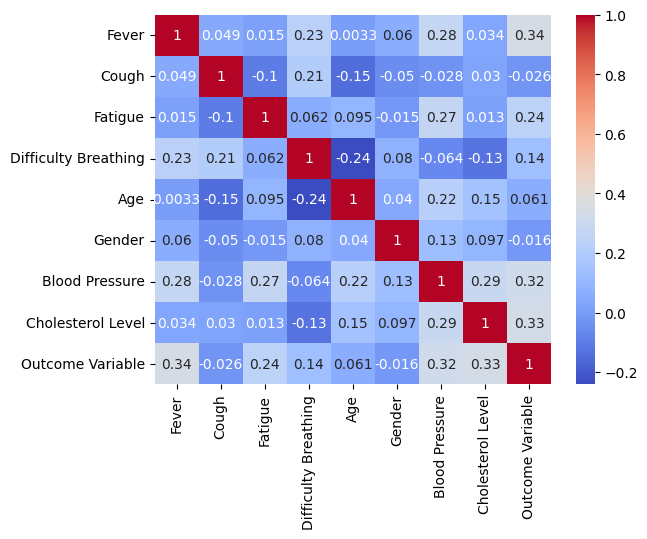

In [337]:
sns.heatmap(df.drop("Disease", axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()


In [338]:
label_encoder = LabelEncoder()
disease_encoder = label_encoder.fit_transform(df["Disease"])

In [339]:
X = df[["Fever","Cough","Fatigue","Difficulty Breathing","Blood Pressure","Cholesterol Level"]]
y = df["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [387]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [376]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
#df.groupby(by='Disease').mean()


LogisticRegression()

In [384]:
y_pred = model.predict(X_resampled)
y_pred


array(['Diabetes', 'Pancreatitis', 'Pancreatitis', "Crohn's Disease",
       "Parkinson's Disease", 'Liver Cancer', 'Hypertension',
       'Hypothyroidism', 'Multiple Sclerosis', "Crohn's Disease",
       'Hypothyroidism', 'Depression', 'Pneumonia', 'Depression',
       'Liver Cancer', 'Stroke', 'Multiple Sclerosis', 'Pancreatitis',
       'Hypertension', "Crohn's Disease", 'Depression', 'Asthma',
       'Liver Disease', 'Hypertension', "Parkinson's Disease",
       'Hypertension', 'Rheumatoid Arthritis', 'Liver Cancer',
       'Multiple Sclerosis', 'Rheumatoid Arthritis', 'Hypothyroidism',
       "Crohn's Disease", 'Coronary Artery Disease', 'Hypothyroidism',
       'Pneumonia', 'Pancreatitis', 'Multiple Sclerosis',
       'Hyperthyroidism', 'Hypertension', 'Influenza', 'Liver Disease',
       'Liver Disease', 'Gastroenteritis', 'Stroke', 'Hypothyroidism',
       'Psoriasis', 'Bronchitis', 'Liver Cancer', 'Bronchitis',
       'Urinary Tract Infection', "Crohn's Disease", 'Hyperthyroid

In [385]:
y_pred = model.predict(X_resampled)  # Use only features to predict labels

# Compute accuracy with true labels
accuracy = accuracy_score(y_resampled, y_pred)

In [386]:
accuracy

0.19301470588235295

In [380]:


print(pd.Series(y_resampled.value_counts()))



Disease
Hypertension               17
Alzheimer's Disease        17
Crohn's Disease            17
Hyperthyroidism            17
Influenza                  17
Osteoarthritis             17
Common Cold                17
Gastroenteritis            17
Kidney Disease             17
Pneumonia                  17
Ulcerative Colitis         17
Hypothyroidism             17
Liver Disease              17
Allergic Rhinitis          17
Psoriasis                  17
Eczema                     17
Rheumatoid Arthritis       17
Asthma                     17
Depression                 17
Diabetes                   17
Migraine                   17
Bronchitis                 17
Multiple Sclerosis         17
Urinary Tract Infection    17
Osteoporosis               17
Coronary Artery Disease    17
Kidney Cancer              17
Liver Cancer               17
Anxiety Disorders          17
Stroke                     17
Pancreatitis               17
Parkinson's Disease        17
Name: count, dtype: int64


In [381]:
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [382]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [383]:
with open("column_names.pkl", "wb") as f:
    pickle.dump(X_train.columns, f  )